<a href="https://colab.research.google.com/github/therealellam/CORE/blob/main/BANKING_PENETRATION_IN_EAST_AFRICA_BELLAH_ELLAM_IP_WEEK2_CORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Defining the Question**


>  # a) Specifying the Question



How we can predict which individuals are most likely to have or use a bank account to help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda

> # b) Metrics for Success



Attrition levels


> # c) Understanding context

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account. 

Access to bank accounts is therefore an essential contributor to long-term economic growth.

> # d) Data Relevance

The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018 

# **2. Importing Libraries**

In [ ]:
#We first import python libraries we will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **3. Loading the Dataset**

In [ ]:
#Load the Data into a dataframe
#The dataset used in this project was provided in the following 
#url = "http://bit.ly/FinancialDataset" 

df=pd.read_csv('/content/Financial Dataset - 1.csv')

#Viewing the first 5 entries
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# **4. Checking the Data**

In [ ]:
# Determining the no. of records in the dataset
df.shape

(23524, 13)

In [ ]:
# Checking whether each column has an appropriate datatype
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

# **5. Tidying the Dataset**

In [ ]:
#Checking for Missing Values
df.isnull().values.any()

True

In [ ]:
# Dealing with the Missing Data
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
#dropping rows with na values
df1= df.dropna(axis=0)
df1.shape

(23343, 13)

In [ ]:
#Checking if there are null values in the new dataframe
df1.isnull().values.any()

False

# **6. Renaming Columns**

In [ ]:
df2= df1.rename(columns = {'Has a Bank account': 'Bank account', 'Type of Location': 'Location type',
                           'gender_of_respondent': 'Gender','Type of Job': 'Job type'}, inplace = False)
df2.columns

Index(['country', 'year', 'uniqueid', 'Bank account', 'Location type',
       'Cell Phone Access', 'household_size', 'Respondent Age', 'Gender',
       'The relathip with head', 'marital_status', 'Level of Educuation',
       'Job type'],
      dtype='object')

# **7. Checking for & Removing Duplicates**

In [ ]:
#checking data for duplicates
df2.duplicated().values.any()

False

In [ ]:
#Dropping Duplicates
df2.drop_duplicates(keep=False,inplace=True)

df2.duplicated().values.any()


False

# **EXPLORATORY ANALYSIS**

# **Univariate Analysis - Categorical Variables**

In [ ]:
#checking column data type
df2.dtypes

country                    object
year                        int64
uniqueid                   object
Bank account               object
Location type              object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
Gender                     object
The relathip with head     object
marital_status             object
Level of Educuation        object
Job type                   object
dtype: object

In [ ]:
#Frequency Tables

col_cat= df2.columns[df2.dtypes == 'object']

col_cat

print("Country Column Frequency table")
display(df2.country.value_counts())
print('')

print("Gender Column Frequency table")
display(df2.Gender.value_counts())
print('')

print("Bank account Column Frequency table")
display(df2['Bank account'].value_counts())
print('')

print("Location type Column Frequency table")
display(df2['Location type'].value_counts())
print('')

print("Cell Phone Access Column Frequency table")
display(df2['Cell Phone Access'].value_counts())
print('')

print("The relathip with head Column Frequency table")
display(df2['The relathip with head'].value_counts())
print('')

print("marital_status Column Frequency table")
display(df2['marital_status'].value_counts())
print('')

print("Level of Educuation Column Frequency table")
display(df2['Level of Educuation'].value_counts())
print('')

print("Job type Column Frequency table")
display(df2['Job type'].value_counts())
print('')

Country Column Frequency table


Rwanda      8684
Tanzania    6500
Kenya       6064
Uganda      2095
Name: country, dtype: int64


Gender Column Frequency table


Female    13767
Male       9576
Name: Gender, dtype: int64


Bank account Column Frequency table


No     20046
Yes     3297
Name: Bank account, dtype: int64


Location type Column Frequency table


Rural    14264
Urban     9079
Name: Location type, dtype: int64


Cell Phone Access Column Frequency table


Yes    17334
No      6009
Name: Cell Phone Access, dtype: int64


The relathip with head Column Frequency table


Head of Household      12730
Spouse                  6471
Child                   2221
Parent                  1069
Other relative           663
Other non-relatives      189
Name: The relathip with head, dtype: int64


marital_status Column Frequency table


Married/Living together    10700
Single/Never Married        7903
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: marital_status, dtype: int64


Level of Educuation Column Frequency table


Primary education                  12689
No formal education                 4467
Secondary education                 4207
Tertiary education                  1144
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: Level of Educuation, dtype: int64


Job type Column Frequency table


Self employed                   6361
Informally employed             5550
Farming and Fishing             5422
Remittance Dependent            2509
Other Income                    1077
Formally employed Private       1048
No Income                        618
Formally employed Government     386
Government Dependent             247
Dont Know/Refuse to answer       125
Name: Job type, dtype: int64

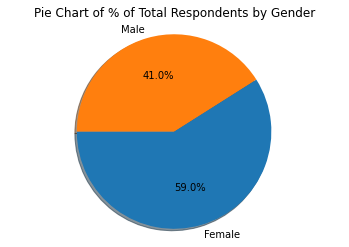

In [ ]:
#Plotting Pie Graphs - Gender Representation

tp = df2.Gender.unique()
Gender = df2.groupby(['Gender'])["uniqueid"].count()

plt.pie(Gender, labels = tp, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.axis('equal')
plt.title('Pie Chart of % of Total Respondents by Gender')
plt.show()


59% of our sample constituted of female respondents while the male made up for the remaining 41%

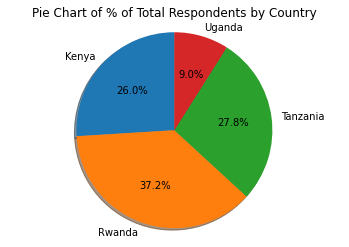

In [ ]:
#Country Representation

tp = df2.country.unique()
country = df2.groupby(['country'])["uniqueid"].count()

plt.pie(country, labels = tp, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Pie Chart of % of Total Respondents by Country')
plt.show()

Of the the total sample size, 37% of the respondents were from Rwanda, 29% from Tanzania, 265 from kenya and only 9% from Uganda

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


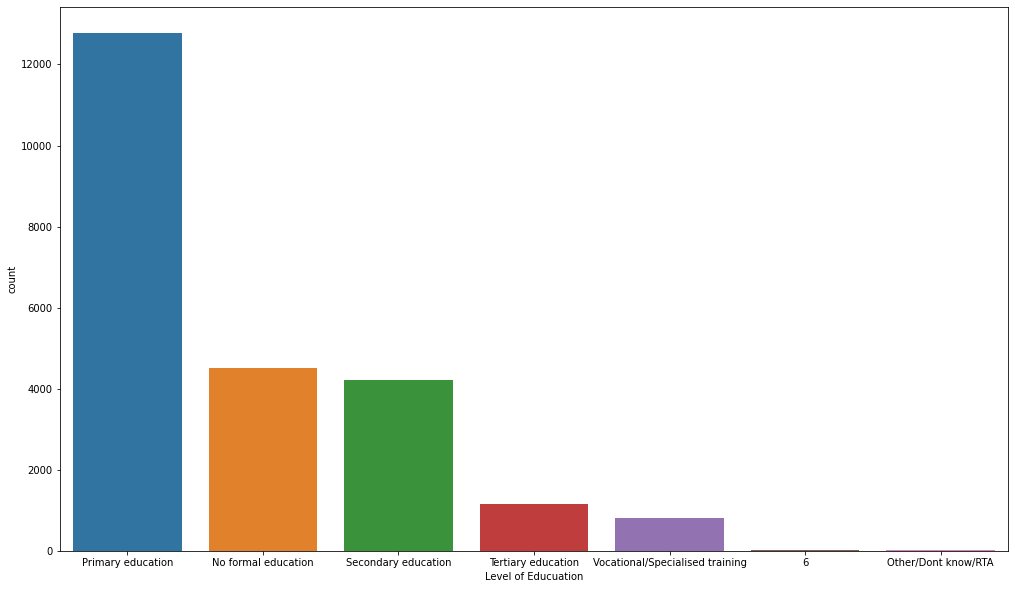

In [ ]:
plt.figure(figsize=(17, 10))
sns.countplot(df['Level of Educuation'], order = df['Level of Educuation'].value_counts().index)

The plot above shows that many of our respondents apprx 11000 only had primary level of Education

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


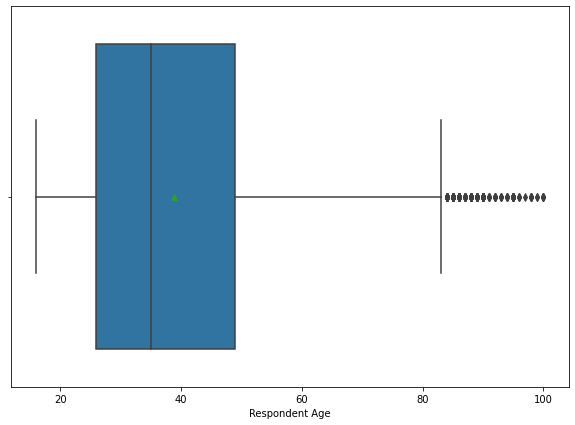

In [ ]:
#plotting Age values to find outliers
plt.figure(figsize=(10, 7))
sns.boxplot(df2["Respondent Age"], showmeans=True)

Our age analysis depicted that we had outliers in the Respondent Age column

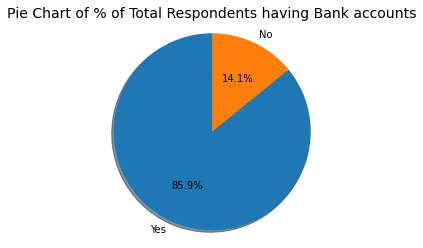

In [ ]:
tp = df2['Bank account'].unique()
country = df2.groupby(['Bank account'])["uniqueid"].count()

plt.pie(country, labels = tp, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Pie Chart of % of Total Respondents having Bank accounts', fontsize=14)
plt.show()

86% of our respondents said that they have a Bank account

# **Numerical variables**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


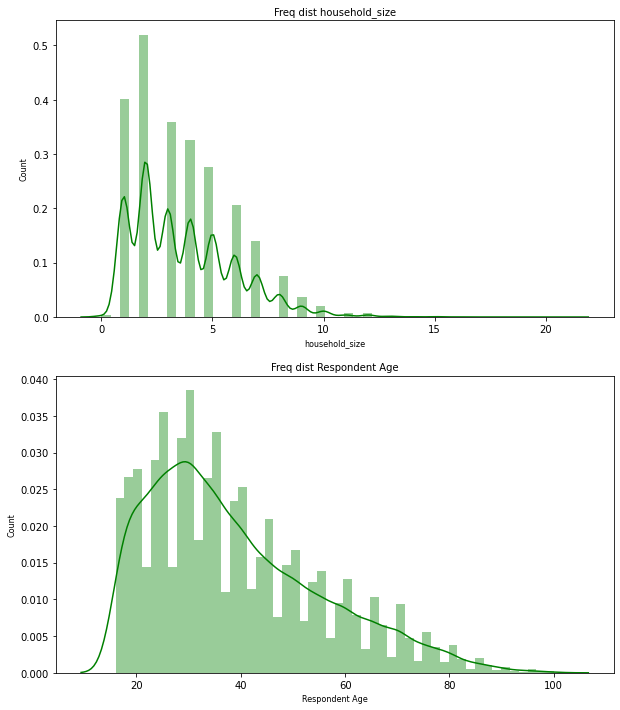

In [ ]:
#Analyzing numerical columns

col_names = ['household_size','Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(10,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i],color= 'green')
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

**Measures of Central tendency**

In [ ]:
#Size of the Household

display("The average household size is ",df2['household_size'].mean())
display("The median household size is ", df2['household_size'].median())
display("The household size with highest frequency is ", df2['household_size'].mode())

'The average household size is '

3.6886432763569377

'The median household size is '

3.0

'The household size with highest frequency is '

0    2.0
dtype: float64

In [ ]:
#Respondents Age

display("The average age is ",df2['Respondent Age'].mean())
display("The median Age is ", df2['Respondent Age'].median())
display("The mode Age is ", df2['Respondent Age'].mode())

'The average age is '

38.80550914621085

'The median Age is '

35.0

'The mode Age is '

0    30.0
dtype: float64

**Measures of Dispersion**

In [ ]:
#Respondents Age

display("Age variance is ",df2['Respondent Age'].var())
display("Age standard deviation is ", df2['Respondent Age'].std())
display("Age quantiles", df2['Respondent Age'].quantile([0.25,0.50,0.75 ]))
display("Age skew", df2['Respondent Age'].skew())
display("Age kurtosis", df2['Respondent Age'].kurt())

'Age variance is '

272.90390761391353

'Age standard deviation is '

16.51980349804178

'Age quantiles'

0.25    26.0
0.50    35.0
0.75    49.0
Name: Respondent Age, dtype: float64

'Age skew'

0.840661747532081

'Age kurtosis'

0.09844652254807196

In [ ]:
#Household Size

display("household_size Variance is ",df2['household_size'].var())
display("household_size standard deviation is ", df2['household_size'].std())
display("household_size quantiles", df2['household_size'].quantile([0.25,0.50,0.75 ]))
display("household_size skew", df2['household_size'].skew())
display("household_size kurtosis", df2['household_size'].kurt())

'household_size Variance is '

5.20379827489179

'household_size standard deviation is '

2.2811835250351495

'household_size quantiles'

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

'household_size skew'

0.9741086837897069

'household_size kurtosis'

1.1538690689335573

# **Bivariate Analysis**

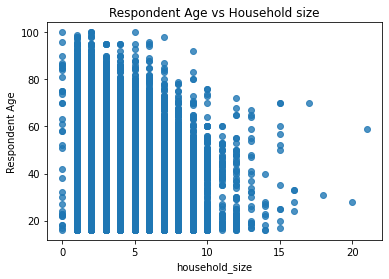

In [ ]:
#Using the seaborn function regplot to create our scatterplot
sns.regplot(x = df2["household_size"], y = df2["Respondent Age"], fit_reg=False)

# # Giving our scatterplot a title
plt.title('Respondent Age vs Household size')

# # We then display our scatterplot as shown below
plt.show()

**Correlation**

In [ ]:
#correlation between the Respondents age and Household size

coeff = df2["household_size"].corr(df2["Respondent Age"], method="pearson") 
print(coeff)

## there seem to be very weak negative correlation between respondents age and household sizes

-0.11970919507762415


Text(0.5, 1.0, 'Stacked chart of Age and having a Bank Account')

<Figure size 1080x720 with 0 Axes>

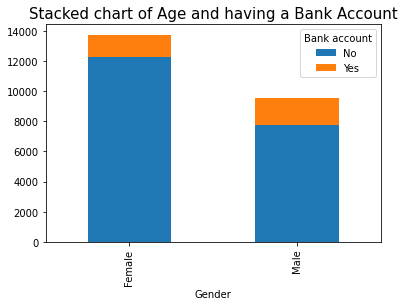

In [ ]:
#Gender vs having a Bank account

plt.figure(figsize=(15, 10))
pd.crosstab(df2['Gender'], df2['Bank account']).plot(kind='bar', stacked=True)
plt.title('Stacked chart of Age and having a Bank Account', fontsize=15)

Text(0.5, 1.0, 'Stacked chart of Education Level and having a Bank Account')

<Figure size 1080x720 with 0 Axes>

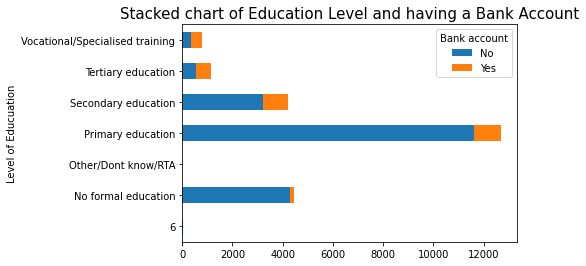

In [ ]:
#Education level vs Having a bank account

plt.figure(figsize=(15, 10))
pd.crosstab(df2['Level of Educuation'], df2['Bank account']).plot(kind='barh', stacked=True)
plt.title('Stacked chart of Education Level and having a Bank Account', fontsize=15)

Text(0.5, 1.0, 'Stacked chart of Age and having a Bank Account')

<Figure size 1080x720 with 0 Axes>

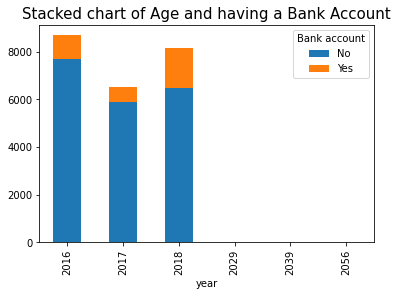

In [ ]:
plt.figure(figsize=(15, 10))
pd.crosstab(df2['year'], df2['Bank account']).plot(kind='bar', stacked=True)
plt.title('Stacked chart of Age and having a Bank Account', fontsize=15)

Text(0.5, 1.0, 'Stacked chart of Country and having a Bank Account')

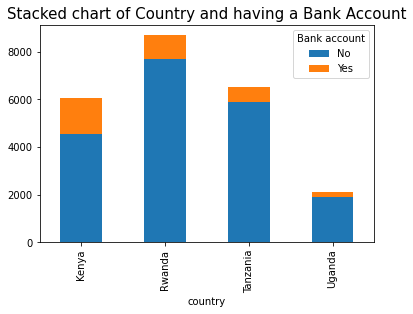

In [ ]:
#Those who have bank accounts based on country
pd.crosstab(df2['country'], df2['Bank account']).plot(kind='bar', stacked=True)
plt.title('Stacked chart of Country and having a Bank Account', fontsize=15)

#**Multivariate Analysis**

# **INSIGHTS FOR IMPROVEMENT**

1. For future studies, data with more variables can be used to be able to measure underlying issues like satisfaction and other factors that may influence banking penetration. This will also enable comparing the results with other ML methodologies used like Factor analysis.